Importing Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re
import nltk
from nltk.corpus import stopwords

from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


Loading Dataset

In [2]:
train_data = pd.read_csv(r'C:\Users\payus\OneDrive\Desktop\Python Proj\nlp-getting-started\train.csv')
test_data = pd.read_csv(r'C:\Users\payus\OneDrive\Desktop\Python Proj\nlp-getting-started\test.csv')

In [3]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
# in target column, 1 denotes - disaster tweet, 0 denotes non disaster tweet

In [5]:
# Disaster related tweet
train_data[train_data['target']==1]['text'].values[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [6]:
# Non Disaster tweet
train_data[train_data['target']==0]['text'].values[1]

'I love fruits'

In [7]:
train_data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
train_subset = train_data[['text','target']]
train_subset.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
train_subset['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

<AxesSubplot: xlabel='target', ylabel='count'>

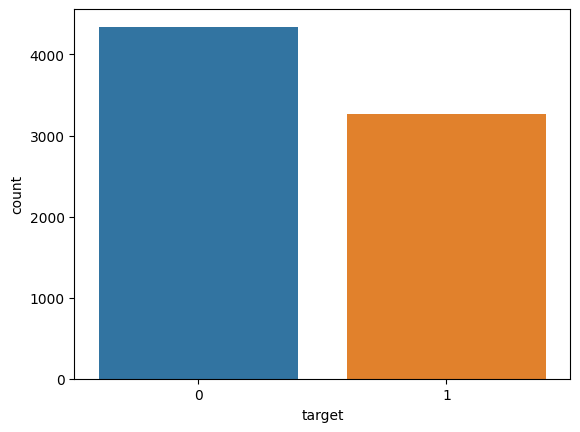

In [10]:
sns.countplot(x=train_subset['target'])

# 1 - disaster tweet
# 0 - Non disaster tweet

In [11]:
test_subset = test_data[['text']]
test_subset.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [12]:
text_before_cleaning = train_subset['text']
text_before_cleaning.head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

### Text Data Processing

In [13]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) # will sub "[?]" with a blank str in texts 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text) # words containing digit
    return text

# Applying the cleaning function to both test and training datasets
train_subset['text'] = train_subset['text'].apply(lambda x: clean_text(x))
test_subset['text'] = test_subset['text'].apply(lambda x: clean_text(x))

# Let's take a look at the updated text
train_subset['text'].head()

C:\Users\payus\AppData\Local\Temp\ipykernel_1848\2572555281.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_subset['text'] = train_subset['text'].apply(lambda x: clean_text(x))
C:\Users\payus\AppData\Local\Temp\ipykernel_1848\2572555281.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_subset['text'] = test_subset['text'].apply(lambda x: clean_text(x))


0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

Tokenization

In [14]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
train_subset['text'] = train_subset['text'].apply(lambda x : tokenizer.tokenize(x))
test_subset['text'] = test_subset['text'].apply(lambda x : tokenizer.tokenize(x))
train_subset.head()

C:\Users\payus\AppData\Local\Temp\ipykernel_1848\1618622985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_subset['text'] = train_subset['text'].apply(lambda x : tokenizer.tokenize(x))
C:\Users\payus\AppData\Local\Temp\ipykernel_1848\1618622985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_subset['text'] = test_subset['text'].apply(lambda x : tokenizer.tokenize(x))


,text,target
0,"[our, deeds, are, the, reason, of, this, earth...",1
1,"[forest, fire, near, la, ronge, sask, canada]",1
2,"[all, residents, asked, to, shelter, in, place...",1
3,"[people, receive, wildfires, evacuation, order...",1
4,"[just, got, sent, this, photo, from, ruby, ala...",1


Removing Stop Words

In [15]:
def remove_stopword(word):
    words = [a for a in word if a not in stopwords.words('english')]
    return words

train_subset['text'] = train_subset['text'].apply(lambda x : remove_stopword(x))
test_subset['text'] = test_subset['text'].apply(lambda x : remove_stopword(x))
train_subset.head()

C:\Users\payus\AppData\Local\Temp\ipykernel_1848\3435103059.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_subset['text'] = train_subset['text'].apply(lambda x : remove_stopword(x))
C:\Users\payus\AppData\Local\Temp\ipykernel_1848\3435103059.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_subset['text'] = test_subset['text'].apply(lambda x : remove_stopword(x))


,text,target
0,"[deeds, reason, earthquake, may, allah, forgiv...",1
1,"[forest, fire, near, la, ronge, sask, canada]",1
2,"[residents, asked, shelter, place, notified, o...",1
3,"[people, receive, wildfires, evacuation, order...",1
4,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1


Combining text

In [16]:
def combine_text(list_of_word):
    combine_text = ' '.join(list_of_word)
    return combine_text

train_subset['text'] = train_subset['text'].apply(lambda x : combine_text(x))
test_subset['text'] = test_subset['text'].apply(lambda x : combine_text(x))
train_subset.head()

C:\Users\payus\AppData\Local\Temp\ipykernel_1848\3756164496.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_subset['text'] = train_subset['text'].apply(lambda x : combine_text(x))
C:\Users\payus\AppData\Local\Temp\ipykernel_1848\3756164496.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_subset['text'] = test_subset['text'].apply(lambda x : combine_text(x))


,text,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,people receive wildfires evacuation orders cal...,1
4,got sent photo ruby alaska smoke wildfires pou...,1


In [17]:
train_subset.head()

,text,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,people receive wildfires evacuation orders cal...,1
4,got sent photo ruby alaska smoke wildfires pou...,1


In [18]:
train_subset.head()

,text,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,people receive wildfires evacuation orders cal...,1
4,got sent photo ruby alaska smoke wildfires pou...,1


In [19]:
test_subset.head()

,text
0,happened terrible car crash
1,heard earthquake different cities stay safe ev...
2,forest fire spot pond geese fleeing across str...
3,apocalypse lighting spokane wildfires
4,typhoon soudelor kills china taiwan


In [20]:
cleaned_text = train_subset['text']

In [21]:
frame = [text_before_cleaning,cleaned_text]
result = pd.concat(frame, axis = 1, sort = False)
result

,text,text
0,Our Deeds are the Reason of this #earthquake M...,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders cal...
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfires pou...
...,...,...
7608,Two giant cranes holding a bridge collapse int...,two giant cranes holding bridge collapse nearb...
7609,@aria_ahrary @TheTawniest The out of control w...,ariaahrary thetawniest control wild fires cali...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,volcano hawaii
7611,Police investigating after an e-bike collided ...,police investigating ebike collided car little...


Count vectorizer


#### https://www.linkedin.com/pulse/count-vectorizers-vs-tfidf-natural-language-processing-sheel-saket/

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()
train_vector = count_vector.fit_transform(train_subset['text'])
test_vector = count_vector.transform(test_subset['text'])

print(train_vector[0].todense())

[[0 0 0 ... 0 0 0]]


In [23]:
print(train_subset['text'][0])
print(train_vector[0].toarray())

deeds reason earthquake may allah forgive us
[[0 0 0 ... 0 0 0]]


TF - IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer()
tfidf_train_vector = tfidf_vector.fit_transform(train_subset['text'])
tfidf_test_vector = tfidf_vector.transform(test_subset['text'])

print(train_subset['text'][0])
print(tfidf_train_vector[0].toarray())

deeds reason earthquake may allah forgive us
[[0. 0. 0. ... 0. 0. 0.]]


In [25]:
X = tfidf_train_vector
y = train_subset['target']
X.shape, y.shape

((7613, 16412), (7613,))

Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

Logistic Regression

In [27]:
lg = LogisticRegression(C = 1.0)
lg.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = lg.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [29]:
test_set = ['earthquake destroyed our home','our area is flooded due to heavy rainfall','hey how are you?']
new_test = tfidf_vector.transform(test_set)
lg.predict(new_test)


array([1, 1, 0], dtype=int64)

In [30]:
scores = model_selection.cross_val_score(lg,train_vector, train_subset["target"], cv=5, scoring="f1")
scores

array([0.59865255, 0.49611063, 0.57166948, 0.56290774, 0.68789809])

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85      1318
           1       0.86      0.64      0.73       966

    accuracy                           0.80      2284
   macro avg       0.82      0.78      0.79      2284
weighted avg       0.81      0.80      0.80      2284



In [41]:
print(accuracy_score(y_test,y_pred))

0.8042907180385289


Multinomial Naive Bayes

In [32]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

mnb_y_pred = mnb.predict(X_test)
mnb_y_pred



array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [33]:
test_set = ['earthquake destroyed our home','our area is flooded due to heavy rainfall','hey how are you?']
new_test = tfidf_vector.transform(test_set)
mnb.predict(new_test)

array([1, 1, 0], dtype=int64)

In [34]:
print(classification_report(y_test,mnb_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1318
           1       0.84      0.67      0.74       966

    accuracy                           0.80      2284
   macro avg       0.81      0.79      0.79      2284
weighted avg       0.81      0.80      0.80      2284



In [42]:
print(accuracy_score(y_test,mnb_y_pred))

0.8042907180385289


Support Vector Machine

In [35]:
clf_svm = svm.SVC(kernel = "linear")
clf_svm.fit(X_train,y_train)
svm_y_pred = clf_svm.predict(X_test)
svm_y_pred



array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [47]:
test_set = [' who is here', 'flood flood save us','Jesus is here', 'volcanic eruption, save us']
new_test = tfidf_vector.transform(test_set)
clf_svm.predict(new_test)

array([0, 1, 0, 1], dtype=int64)

In [37]:
print(classification_report(y_test,svm_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1318
           1       0.82      0.69      0.75       966

    accuracy                           0.81      2284
   macro avg       0.81      0.79      0.80      2284
weighted avg       0.81      0.81      0.80      2284



In [43]:
print(accuracy_score(y_test,svm_y_pred))

0.8056042031523643


In [38]:
submission = pd.read_csv(r'C:\Users\payus\OneDrive\Desktop\Python Proj\nlp-getting-started\sample_submission.csv')
submission['target'] = clf_svm.predict(test_vector)
submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
